In [1]:
import sys
sys.path.append('../')

In [2]:
from data.cosem_jrc_hela_rawdata import load_jrc_hela_rawdata
# raw_datafpath = '/group/jug/ashesh/bleedthroughsimulation/jrc_hela-3/jrc_hela-3/jrc_hela-3_bleedthrough_EGFP_Venus_R3.0-3.0_S4_D1_Ex100.0ms.tif'
# raw_datafpath = '/group/jug/ashesh/bleedthroughsimulation/jrc_choroid-plexus-2/jrc_choroid-plexus-2_bleedthrough_endo_pred_mito_pred_EGFP_Venus_R3.0-3.0_S2_D1_Ex100.0ms.tif'
# raw_datafpath = '/group/jug/ashesh/bleedthroughsimulation/jrc_choroid-plexus-2/jrc_choroid-plexus-2_bleedthrough_er_pred_endo_pred_EGFP_Venus_R3.0-3.0_S2_D1_Ex100.0ms.tif'
raw_datafpath = '/group/jug/ashesh/bleedthroughsimulation/jrc_choroid-plexus-2/jrc_choroid-plexus-2_bleedthrough_er_pred_mito_pred_EGFP_Venus_R3.0-3.0_S2_D1_Ex100.0ms.tif'
data = load_jrc_hela_rawdata(raw_datafpath)



(96, 2, 1800, 3720) (96, 1800, 3720) (96, 1800, 3720)


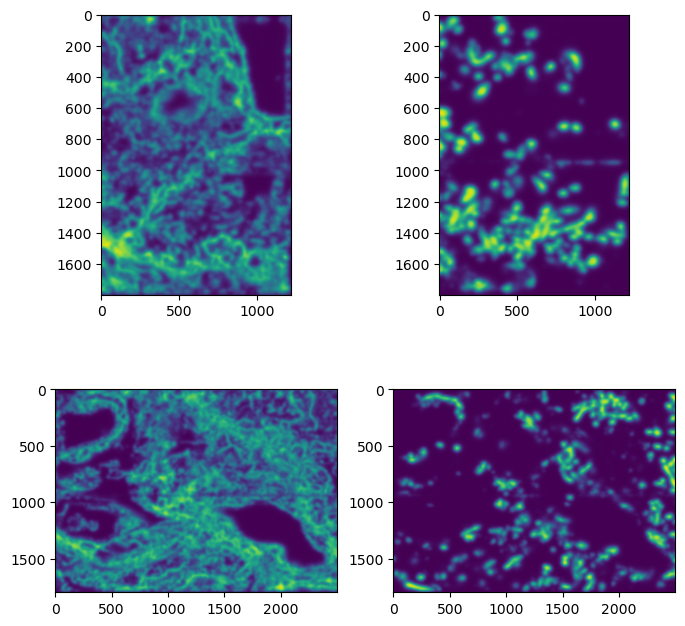

In [3]:
import matplotlib.pyplot as plt
_,ax = plt.subplots(figsize=(8,8),ncols=2,nrows=2)
idx = 0
thresh = 2500
ax[0,0].imshow(data[idx,:,thresh:,0])
ax[0,1].imshow(data[idx,:,thresh:,1])

ax[1,0].imshow(data[idx,:,:thresh,0])
ax[1,1].imshow(data[idx,:,:thresh,1])


In [4]:
data[...,0].min(),data[...,0].max(),data[...,1].min(),data[...,1].max()

(98, 1195, 97, 1972)

In [5]:
import os
outputdir = os.path.dirname(raw_datafpath)
if len(set(outputdir.split('/')[-2:])) == 1:
    outputdir = os.path.dirname(outputdir)


outputdir = os.path.join(outputdir,'train_val_test_split')
os.makedirs(outputdir,exist_ok=True)

print(outputdir)

/group/jug/ashesh/bleedthroughsimulation/jrc_choroid-plexus-2/train_val_test_split


In [6]:
from disentangle.core.tiff_reader import save_tiff
import os
mid = data.shape[1]//2
train_data = data[:,:,:thresh]
val_data =  data[:,:mid,thresh:]
test_data = data[:,mid:,thresh:]
# train_data = data[:,thresh:]
# val_data = data[:,:thresh,:1400]
# test_data =data[:,:thresh,1400:]

print(train_data.shape, val_data.shape, test_data.shape)
raw_datafname = os.path.basename(raw_datafpath)
train_fpath = os.path.join(outputdir,f'train_{raw_datafname}')
save_tiff(train_fpath,train_data)
save_tiff(os.path.join(outputdir,f'val_{raw_datafname}'),val_data)
save_tiff(os.path.join(outputdir,f'test_{raw_datafname}'),test_data)
print(train_fpath)


(96, 1800, 2500, 3) (96, 900, 1220, 3) (96, 900, 1220, 3)


/home/ashesh.ashesh/code/Disentangle/disentangle/core/tiff_reader.py:14: UserWarning: /group/jug/ashesh/bleedthroughsimulation/jrc_choroid-plexus-2/train_val_test_split/train_jrc_choroid-plexus-2_bleedthrough_er_pred_mito_pred_EGFP_Venus_R3.0-3.0_S2_D1_Ex100.0ms.tif is a low contrast image
  imsave(path, data, plugin='tifffile')
/home/ashesh.ashesh/code/Disentangle/disentangle/core/tiff_reader.py:14: UserWarning: /group/jug/ashesh/bleedthroughsimulation/jrc_choroid-plexus-2/train_val_test_split/val_jrc_choroid-plexus-2_bleedthrough_er_pred_mito_pred_EGFP_Venus_R3.0-3.0_S2_D1_Ex100.0ms.tif is a low contrast image
  imsave(path, data, plugin='tifffile')
/home/ashesh.ashesh/code/Disentangle/disentangle/core/tiff_reader.py:14: UserWarning: /group/jug/ashesh/bleedthroughsimulation/jrc_choroid-plexus-2/train_val_test_split/test_jrc_choroid-plexus-2_bleedthrough_er_pred_mito_pred_EGFP_Venus_R3.0-3.0_S2_D1_Ex100.0ms.tif is a low contrast image
  imsave(path, data, plugin='tifffile')


/group/jug/ashesh/bleedthroughsimulation/jrc_choroid-plexus-2/train_val_test_split/train_jrc_choroid-plexus-2_bleedthrough_er_pred_mito_pred_EGFP_Venus_R3.0-3.0_S2_D1_Ex100.0ms.tif
